In [3]:
import pandas as pd
df = pd.read_csv("finalGarminData_6Month.csv")

In [4]:
survey_df_2 = pd.read_excel('7105000 (2).xlsx')
survey_df_2['local_time'] = [d.date() for d in survey_df_2['local_time']]
survey_df_2['Date'] = pd.to_datetime(survey_df_2['local_time'])
survey_df_2['Month'] = survey_df_2['Date'].dt.month
survey_df_abs = survey_df_2[['Month', 'LIFE_SATISFACTION', 'HAPPINESS', 'PHYSICAL_HEALTH', 'MENTAL_HEALTH']]
survey_df_abs = survey_df_abs.groupby(by="Month", as_index=False).mean()
survey_df_abs

,Month,LIFE_SATISFACTION,HAPPINESS,PHYSICAL_HEALTH,MENTAL_HEALTH
0,5,8.397163,8.226950,8.049645,8.184397
1,6,8.469388,8.356164,8.054795,8.226027
2,7,8.600000,8.452830,8.443038,8.443038
3,8,8.891667,8.741667,8.550000,8.558333
4,9,9.233645,8.981308,8.682243,8.859813
5,10,9.000000,8.945055,8.644444,8.777778


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df = df.groupby(by="Month", as_index=False).mean()
df = df[df.Month != 4]
df = df[df.Month != 11]
df

<ipython-input-5-eacbc2281f33>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(by="Month", as_index=False).mean()


,Month,Participant Id,calories,floorsClimbed,hr,intensityMinutes,steps,stress
1,5.0,6.038243e+07,1541.932668,5.955137,78.935082,43.997041,4052.625000,35.001766
2,6.0,5.821087e+07,1391.854571,4.275701,78.696980,32.327362,3350.071014,32.287699
3,7.0,5.737539e+07,1367.886165,4.824111,78.579823,27.450413,3238.038674,31.551338
4,8.0,5.785663e+07,1406.368705,5.809709,77.963322,41.204771,3992.388889,30.744824
5,9.0,5.825261e+07,1413.112016,5.884615,78.530678,37.821429,3995.429787,33.026464
6,10.0,5.734617e+07,1349.272494,5.377907,78.012737,29.008955,3589.128415,31.215162


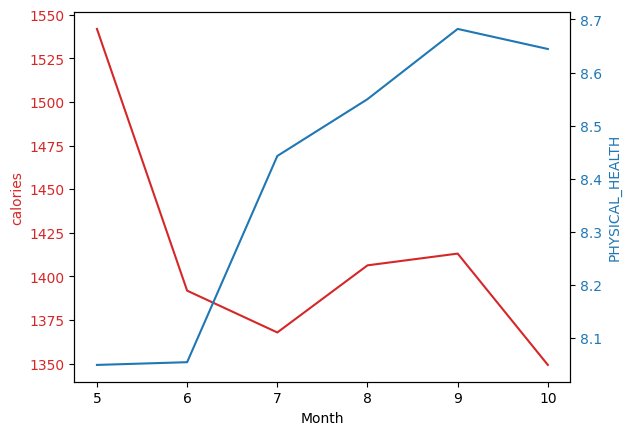

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
color = 'tab:red'
fig, ax1 = plt.subplots()
ax1.plot(df.Month, df['calories'], color )
ax1.set_ylabel('calories', color=color ) 
ax1.tick_params(axis='y', labelcolor=color )
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(survey_df_abs.Month, survey_df_abs['PHYSICAL_HEALTH'], color)
ax2.set_ylabel('PHYSICAL_HEALTH', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Month') 
plt.show()

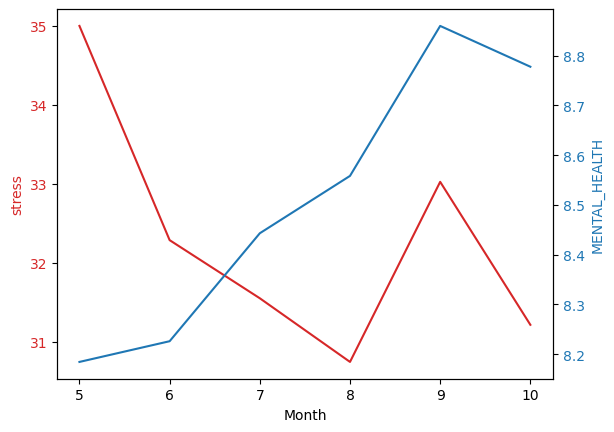

In [ ]:
color = 'tab:red'
fig, ax1 = plt.subplots()
ax1.plot(df.Month, df['stress'], color )
ax1.set_ylabel('stress', color=color ) 
ax1.tick_params(axis='y', labelcolor=color )
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(survey_df_abs.Month, survey_df_abs['MENTAL_HEALTH'], color)
ax2.set_ylabel('MENTAL_HEALTH', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Month') 
plt.show()

In [12]:
survey_df_2 = pd.read_excel('7107000 (2).xlsx')
survey_df_2['local_time'] = [d.date() for d in survey_df_2['local_time']]
survey_df_2['Date'] = pd.to_datetime(survey_df_2['local_time'])
survey_df_2['Month'] = survey_df_2['Date'].dt.month

survey_df_abs_2 = survey_df_2.groupby(by="Month", as_index=False).mean()
survey_df_abs_2['avg flex'] = survey_df_abs_2.iloc[:,11:15].mean(axis=1)
survey_df_abs_2['avg work life'] = survey_df_abs_2.iloc[:,16:20].mean(axis=1)
survey_df_abs_2['avg productivity'] = survey_df_abs_2.iloc[:,21:25].mean(axis=1)
survey_df_avg_flex = survey_df_abs_2[['Month','avg flex','avg work life','avg productivity']]
survey_df_avg_flex

<ipython-input-12-52faf3c182fb>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survey_df_abs_2 = survey_df_2.groupby(by="Month", as_index=False).mean()


,Month,avg flex,avg work life,avg productivity
0,5,2.466791,2.320076,1.606133
1,6,2.555530,2.095779,1.589286
2,7,2.381541,1.817187,1.381348
3,8,2.465278,1.900463,1.414352
4,9,2.524380,1.706019,1.444444
5,10,2.625000,1.784884,1.473837


In [13]:
survey_df_abs_2.iloc[:,21:25]

,PRODUCTIVITY_16,PRODUCTIVITY_17,PRODUCTIVITY_18,PRODUCTIVITY_19
0,1.689394,1.696970,1.404580,1.633588
1,1.629870,1.623377,1.487013,1.616883
2,1.462500,1.427673,1.320755,1.314465
3,1.472222,1.444444,1.351852,1.388889
4,1.490741,1.481481,1.407407,1.398148
5,1.500000,1.465116,1.430233,1.500000


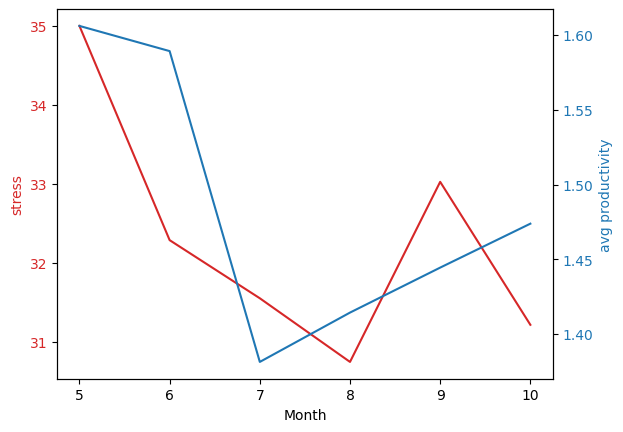

In [14]:
color = 'tab:red'
fig, ax1 = plt.subplots()
ax1.plot(df.Month, df['stress'], color )
ax1.set_ylabel('stress', color=color ) 
ax1.tick_params(axis='y', labelcolor=color )
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(survey_df_avg_flex.Month, survey_df_avg_flex['avg productivity'], color)
ax2.set_ylabel('avg productivity', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Month') 
plt.show()

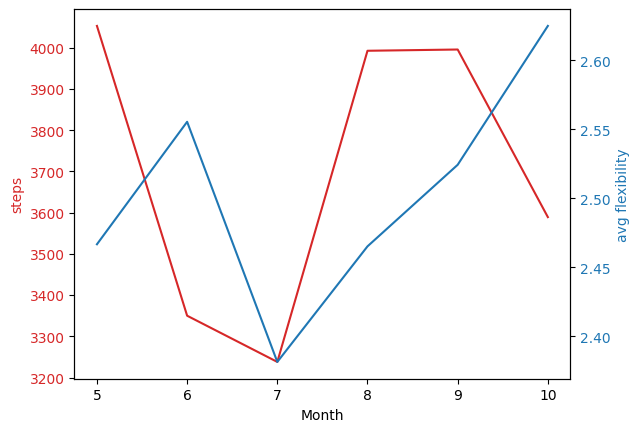

In [15]:
color = 'tab:red'
fig, ax1 = plt.subplots()
ax1.plot(df.Month, df['steps'], color )
ax1.set_ylabel('steps', color=color ) 
ax1.tick_params(axis='y', labelcolor=color )
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(survey_df_avg_flex.Month, survey_df_avg_flex['avg flex'], color)
ax2.set_ylabel('avg flexibility', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Month') 
plt.show()

### HYPOTHESIS TESTING 

In [7]:
from scipy.stats.stats import pearsonr


<ipython-input-7-0ebd78c1f4f1>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.

In [19]:
stat, p = pearsonr(df['calories'], survey_df_abs['PHYSICAL_HEALTH'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('The two variables are independent')
else:
 print('The two variables are dependent')

stat=-0.581, p=0.227
The two variables are independent


In [20]:
stat, p = pearsonr(df['stress'], survey_df_abs['MENTAL_HEALTH'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('The two variables are independent')
else:
 print('The two variables are dependent')

stat=-0.435, p=0.389
The two variables are independent


In [22]:
stat, p = pearsonr(df['stress'], survey_df_avg_flex['avg productivity'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('The two variables are independent')
else:
 print('The two variables are dependent')

stat=0.691, p=0.129
The two variables are independent


In [23]:
stat, p = pearsonr(df['steps'], survey_df_avg_flex['avg flex'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('The two variables are independent')
else:
 print('The two variables are dependent')

stat=0.044, p=0.934
The two variables are independent
